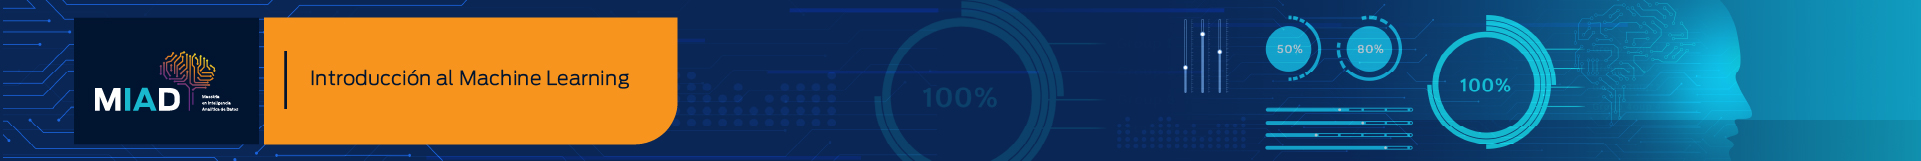

# Introducción al Machine Learning - Semana 4
## Caso: Implementación de modelos no lineales aditivos en un problema de regresión

### Propósito de la actividad

En esta actividad podrán poner en práctica, con un conjunto de datos reales, su habilidad para implementar modelos no lineales aditivos y seleccionar aquel que tenga el mejor desempeño para resolver un problema de regresión. En particular, se deberán implementar modelos MARS y GAM.

Además, como en todo procedimiento de analítica de datos, se evaluará la exploración preliminar de los datos por medio de herramientas como histogramas, correlogramas y estadísticas descriptivas.

### Instrucciones generales

1. Para desarrollar el notebook, lo deberán descargar a un repositorio (pueden escoger el repositorio de su preferencia) para que lo puedan trabajar grupalmente.

2. Los procedimientos en el notebook deberán responderse en los espacios especificados para tal fin, debajo de cada uno de los puntos.

3. Para que la actividad sea calificada, deberán subir únicamente este mismo archivo con la extensión ".ipynb" a la actividad de "entrega calificada por el personal" correspondiente a este caso.

4. El archivo que suban debe poder ejecutarse localmente cuando sea descargado por el tutor, asumiendo que la base de datos de la actividad ya ha sido importada en el correspondiente archivo separado por comas (.csv).

### Criterios de evaluación

Los criterios que se evaluarán son:  

Análisis preliminar de variables: Se presentan correlogramas, histogramas y estadísticas descriptivas de las variables de la base de datos y se hace un análisis coherente de cada uno de ellos. [10 puntos] 

Estimación de modelos lineales: Se estiman los tres modelos lineales solicitados, se evalúan en test y se concluye correctamente qué modelo tiene mayor capacidad predictiva. [10 puntos] 

Estimación del modelo MARS: Se estima el modelo MARS correctamente [15 puntos] 

Interpretación de predictores MARS: Se interpretan al menos tres predictores en el modelo MARS y no se presentan errores en este análisis. [15 puntos] 

Estimación del modelo GAM: Se estima el modelo GAM correctamente [10 puntos] 

Interpretación de predictores GAM: Se interpretan los mismos predictores que en el modelo MARS y no presenta errores en su análisis. [10 puntos] 

Conclusión sobre la primera hipótesis: Se utiliza el procedimiento adecuado para concluir sobre la hipótesis establecida y se realiza el análisis correctamente. [10 puntos] 

Conclusión sobre la segunda hipótesis: Se utiliza el procedimiento adecuado para concluir sobre la hipótesis establecida y se realiza el análisis correctamente. [10 puntos] 

Elección del mejor modelo: Se elige el mejor modelo de acuerdo a los resultados obtenidos y se justifica adecuadamente la elección. [10 puntos]

### Datos

En esta ocasión usarán una base de datos disponible en la página R-Data. Esta base de datos corresponde a "Carseats", la cual contiene 10 variables predictivas. De esta manera, el objetivo de la actividad es predecir la variable de ventas "Sales".

Por lo anterior, en primer lugar deberán descargar la base de datos del siguiente enlace: https://r-data.pmagunia.com/dataset/r-dataset-package-islr-carseats


**Librerias a usar y apertura del archivo**

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso

Carseats= pd.read_csv("Carseats.csv")
Carseats

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [3]:
valores_unicos = Carseats["ShelveLoc"].unique()
print("Valores únicos en 'ShelveLoc':", valores_unicos)

Valores únicos en 'ShelveLoc': ['Bad' 'Good' 'Medium']


In [4]:
cols_to_encode = ['ShelveLoc', 'Urban', 'US']

# Generar columnas dummy para las columnas especificadas
dummies = pd.get_dummies(Carseats[cols_to_encode], prefix=cols_to_encode)

# Eliminar las columnas originales y concatenar los dummies
Carseats = pd.concat([Carseats.drop(cols_to_encode, axis=1), dummies], axis=1)

Carseats

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,True,False,False,False,True,False,True
1,11.22,111,48,16,260,83,65,10,False,True,False,False,True,False,True
2,10.06,113,35,10,269,80,59,12,False,False,True,False,True,False,True
3,7.40,117,100,4,466,97,55,14,False,False,True,False,True,False,True
4,4.15,141,64,3,340,128,38,13,True,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,False,True,False,False,True,False,True
396,6.14,139,23,3,37,120,55,11,False,False,True,True,False,False,True
397,7.41,162,26,12,368,159,40,18,False,False,True,False,True,False,True
398,5.94,100,79,7,284,95,50,12,True,False,False,False,True,False,True


In [5]:
YTotal = Carseats[['Sales']]
XTotal = Carseats.drop(columns = ['Sales'])
XTrain, XTest, yTrain, yTest = train_test_split(XTotal, YTotal, test_size=0.33, random_state=0)


### 1. Análisis preliminar de variables (10 puntos)
Realicen un análisis preliminar de los predictores y de la variable de respuesta (correlogramas, histogramas y estadísticas descriptivas).

In [6]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 1 ####
print(Carseats.describe())
print(Carseats.info())

            Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000

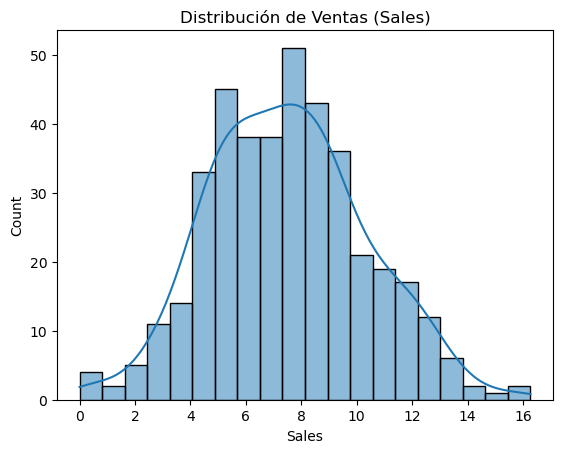

In [7]:
sns.histplot(Carseats["Sales"], kde=True, bins=20)
plt.title("Distribución de Ventas (Sales)")
plt.show()

Corresponde a las ventas de sillas para niños. Como se puede observar sigue una distribución continua donde se concentra la mayoria de ventas en 8 sillas por establecimiento. Gráficamente se podria pensar en una distribución casi - normal para las venta, con una asimetria a la derecha. Además se debe tener en cuenta valores extremos mayores de 12 que podrian considerarse valores de venta altos pero no atípicos. 

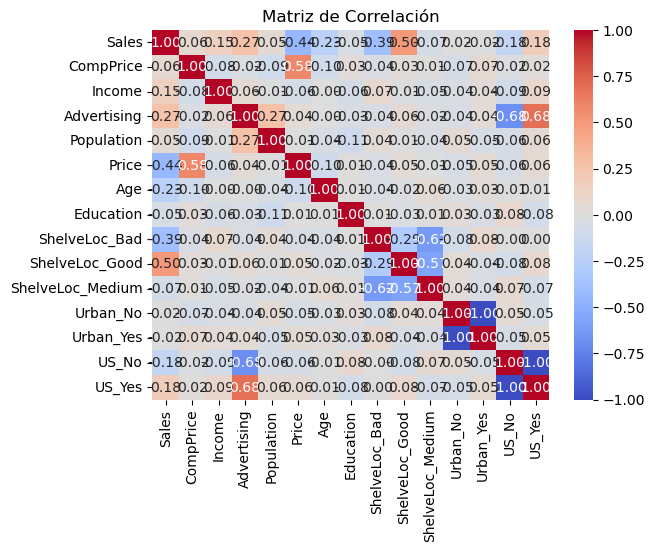

In [8]:
sns.heatmap(Carseats.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

## Análisis de varaible Sales:
Sales tiene relaciones fuertes con las siguientes variables:

- Price: Correlación negativa moderada, lo que indica que a un mayor precio menores ventas
- ShelveLoc_Good: Relación positiva, lo que sugiere que una buena ubicación en el estante, mejora significativamente las ventas. 
- Advertising: La publicidad puede aumentar las ventas de manera moderada.
- Income: Ingresos de clientes pueden influir en las ventas. 

La relaciones entre CompPrice y Price es importante de observar ya que tiene una relación negativa fuerte, coherente con el sentido de que si el precio de la competencia es alta, las tiendas podrían ajustar los precios a la baja para ser competitivas. 

A continuación se muestran las dispersiones para cada una de las variables con relación fuerte de Sales

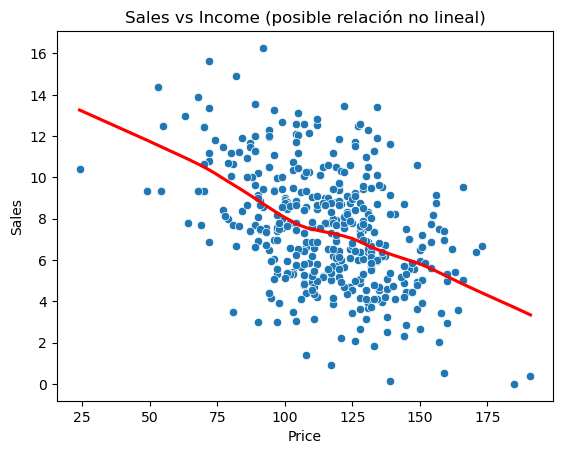

In [9]:
sns.scatterplot(x="Price", y="Sales", data=Carseats)
sns.regplot(x="Price", y="Sales", data=Carseats, scatter=False, lowess=True, color="red")
plt.title("Sales vs Income (posible relación no lineal)")
plt.show()

Relación negativa entre ventas y precio. Coherente con lo la teoría económica. 

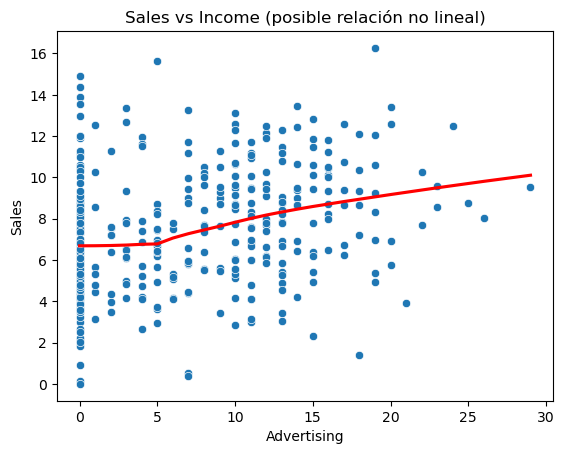

In [10]:
sns.scatterplot(x="Advertising", y="Sales", data=Carseats)
sns.regplot(x="Advertising", y="Sales", data=Carseats, scatter=False, lowess=True, color="red")
plt.title("Sales vs Income (posible relación no lineal)")
plt.show()

Relación debilmente positiva entre la inversión en publicidad y las ventas.

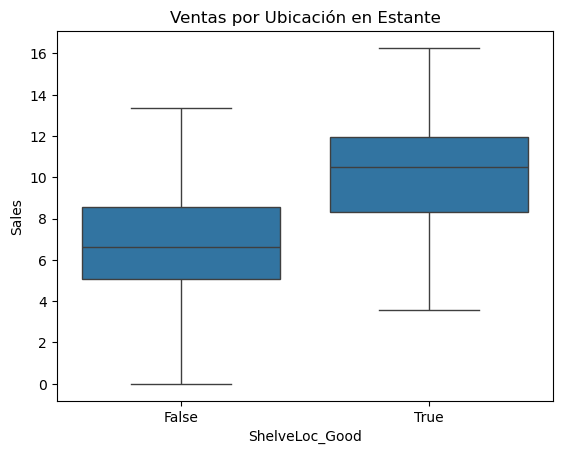

In [11]:
sns.boxplot(x="ShelveLoc_Good", y="Sales", data=Carseats)
plt.title("Ventas por Ubicación en Estante")
plt.show()

Se observa que ubicar el producto en estantantes buenos se puede generar mayores ventas. La atención del cliente se concentra mejor

### 2. Estimación de modelos lineales  (10 puntos)
Encuentren el modelo lineal que mejor predice la variable "Sales" entre Lasso, PCA, PLS. Para esto, estimen los modelos usando la muestra de entrenamiento y evalúen el poder predictivo en la muestra de test. Describan su procedimiento y analicen los resultados.

**PCA**

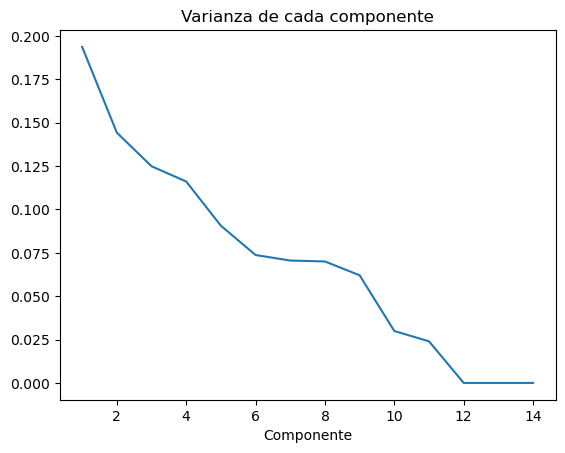

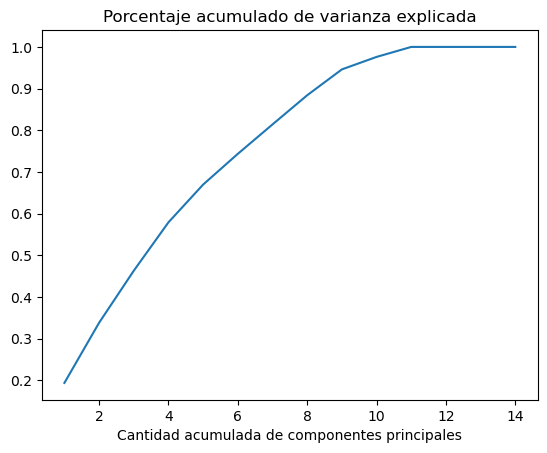

In [12]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 2 ####
### PCA
scaler = StandardScaler()
scaler.fit(XTrain)
XEscaladoTrain=scaler.transform(XTrain)
###Ahora, calcularemos la matriz  𝐴 usando la siguiente línea de código:
p=len(XEscaladoTrain[1,])
pca = PCA(n_components=p).fit(XEscaladoTrain)
A=pca.components_
## GRAFICA
varianzaExplicada=pca.explained_variance_
porcentajeVarianzaExplicada=pca.explained_variance_ratio_
plt.plot(range(1,p+1),porcentajeVarianzaExplicada)
plt.xlabel('Componente')
plt.title('Varianza de cada componente')
plt.show()

## 2
plt.plot(range(1,p+1),np.cumsum(porcentajeVarianzaExplicada))
plt.xlabel('Cantidad acumulada de componentes principales')
plt.title('Porcentaje acumulado de varianza explicada')
plt.show()

Se eligen segun el grafico 9 variables
En primer lugar, centraremos los predictores de la muestra de evaluación con la misma transformación que se utilizó en train,
Luego, usando la matriz $A$ calculada anteriormente, se transforman las variables y se utilizan únicamente las componentes elegidas:

In [13]:
nComponentesElegidas=9

ZTotalTrain=np.matmul(XEscaladoTrain,A)
ZTrain = ZTotalTrain[:,range(nComponentesElegidas)]

regPCA = LinearRegression()
regPCA.fit(ZTrain, yTrain)

XEscaladoTest=scaler.transform(XTest)

ZTotalTest=np.matmul(XEscaladoTest,A)
ZTest = ZTotalTest[:,range(nComponentesElegidas)]

In [14]:
prediccionPCA=regPCA.predict(ZTest)
MSEPCA=np.average(np.square(prediccionPCA-yTest))
print('MSE regresión por componentes principales:')
print(MSEPCA)

MSE regresión por componentes principales:
3.0371103287988457


**PLS**

Estimacion del modelo 

In [15]:
pls = PLSRegression(n_components=p)
pls.fit(XTrain, yTrain)
prediccionPLS=pls.predict(XTest)
### convierte a las predicciones anteriores en el tipo de estructura de datos necesaria para proceder
prediccionPLS=np.hstack(prediccionPLS)

In [16]:
from sklearn.metrics import mean_squared_error

MSEPLS = mean_squared_error(yTest, prediccionPLS)
print('MSE regresión por partial least squares:')
print(MSEPLS)

MSE regresión por partial least squares:
1398040.8328445407


**LASSO**

In [17]:
n_alphas = 200
alphasCalibrar = np.logspace(-10, 2, n_alphas)
modeloLASSO = LassoCV(alphas=alphasCalibrar).fit(XTrain, yTrain)
print('El parámetro de penalización es:')
print(modeloLASSO.alpha_)
print('El valor del R^2 es:')
print(modeloLASSO.score(XTrain, yTrain))
print('Los coeficientes estimados son:')
print(modeloLASSO.coef_)

El parámetro de penalización es:
0.012033778407775905
El valor del R^2 es:
0.8906401406498414
Los coeficientes estimados son:
[ 9.57086807e-02  1.45971808e-02  1.33939353e-01  4.02503159e-05
 -9.99142210e-02 -4.72290326e-02 -6.53026763e-02 -1.98214492e+00
  2.72653044e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  2.29811836e-01 -3.60392164e-16]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


observar lo que sucede con los coeficientes a medida que cambia el valor del parámetro de penalización

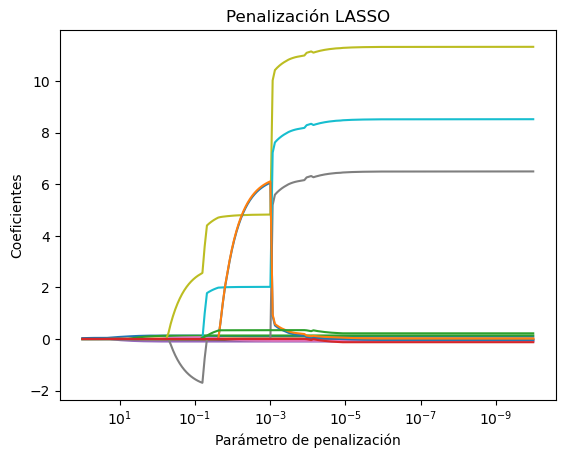

In [18]:
coefs = []
for a in alphasCalibrar:
    lasso = Lasso(alpha=a, fit_intercept=False,max_iter=10000)
    lasso.fit(XTrain, yTrain)
    coefs.append(lasso.coef_)

# Presentación de resultados

ax = plt.gca()

ax.plot(alphasCalibrar, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('Parámetro de penalización')
plt.ylabel('Coeficientes')
plt.title('Penalización LASSO')
plt.axis('tight')
plt.show()

In [19]:
import numpy as np
prediccionLASSO=modeloLASSO.predict(XTest)
prediccionLASSO_array = np.ravel(prediccionLASSO)  # Si prediccionLASSO no es 1D
yTest_array = yTest.values.ravel()                 # Convertir yTest a array 1D

MSELASSO = np.average(np.square(prediccionLASSO_array - yTest_array))
print('MSE regresión con penalización tipo LASSO:', MSELASSO)


MSE regresión con penalización tipo LASSO: 1.2585937798475826


**Comparacion**

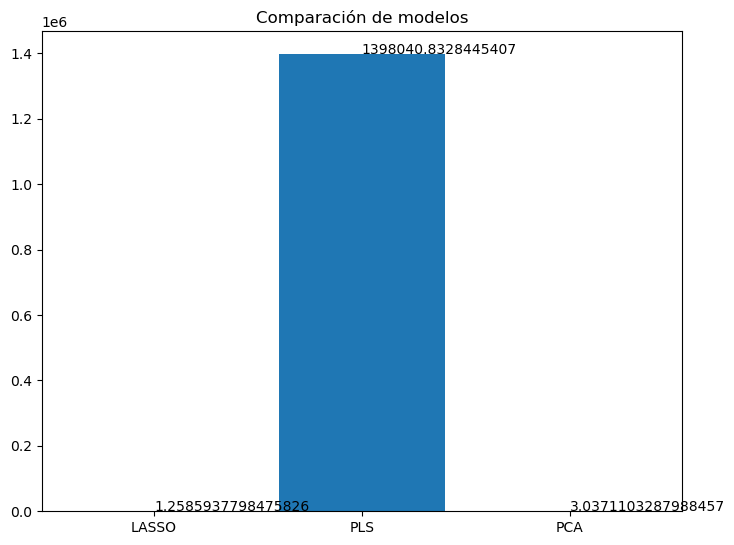

In [20]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos")
ejeX = ['LASSO', 'PLS','PCA']
ejeY = [MSELASSO,MSEPLS,MSEPCA]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

**Conclusion**

**Menor MSE:** El modelo LASSO, con un MSE más bajo, está haciendo predicciones más precisas en promedio que el modelo basado en componentes principales.

**Regularización y Selección de Variables:** LASSO impone una penalización en los coeficientes, lo que no solo ayuda a evitar el sobreajuste, sino que también puede eliminar (poner a cero) variables irrelevantes. Esto puede ser ventajoso si tu conjunto de datos tiene muchas variables o si algunas de ellas son poco informativas.

**PCR:** Aunque la regresión por componentes principales reduce la dimensionalidad extrayendo componentes que explican la mayor parte de la variabilidad de los datos, no necesariamente se enfoca en maximizar la relación con la variable respuesta. Por ello, en algunos casos, puede no capturar las relaciones predictivas tan bien como un método de regularización como LASSO

Dado que el modelo LASSO ha demostrado el menor error y ofrece ventajas en términos de regularización y selección de variables, se elige como la mejor opción para este problema. Sin embargo, es recomendable realizar validación cruzada para afinar el hiperparámetro de penalización (alpha) y verificar la estabilidad del modelo.

### 3. Estimación del modelo MARS e interpretación de predictores (30 puntos)
3.a) Estimen un modelo MARS para predecir la variable "Sales". (15 puntos)

3.b) Interpreten el efecto de al menos 3 predictores. (15 puntos)

In [21]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 3 ####
from pygam import LinearGAM, s

X = Carseats.drop(columns=['Sales'])
y = Carseats['Sales']
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
gam = LinearGAM(s(0) + s(1) + s(2) + s(3) + s(4) + s(5) + s(6) + s(7) + s(8) + s(9) + s(10))
gam.fit(X_train_scaled, y_train)
y_pred_gam = gam.predict(X_test_scaled)
mse_gam = mean_squared_error(y_test, y_pred_gam)
print(f"MSE del modelo GAM: {mse_gam}")
predictors = ['Income', 'Advertising', 'Education']

MSE del modelo GAM: 1.4409326284589201


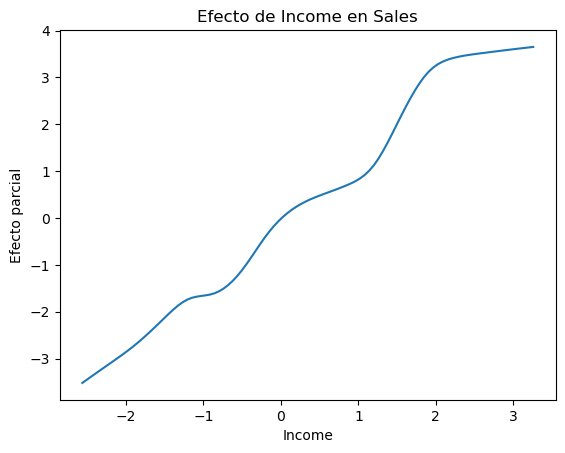

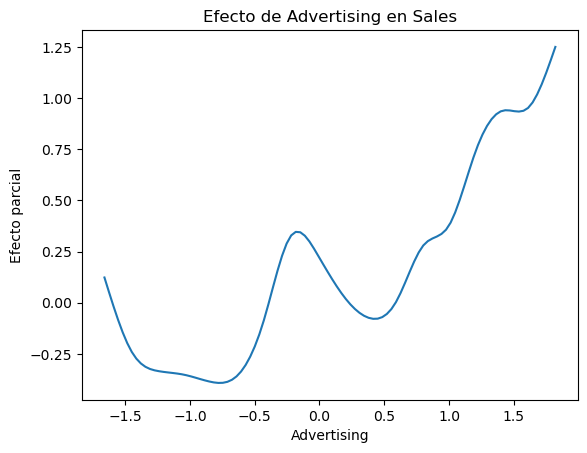

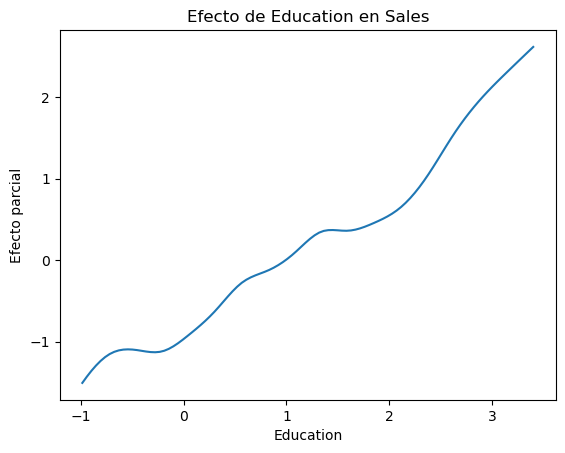

In [23]:
for i, predictor in enumerate(predictors):
    plt.figure()
    XX = gam.generate_X_grid(term=i)
    plt.plot(XX[:, i], gam.partial_dependence(term=i, X=XX))
    plt.xlabel(predictor)
    plt.ylabel('Efecto parcial')
    plt.title(f'Efecto de {predictor} en Sales')
    plt.show()

Para este ejercicio, primero se descargaron y prepararon los datos del conjunto "Carseats". Se separaron las variables predictoras de la variable objetivo "Sales" y se convirtieron las variables categóricas a variables dummy. Luego, se dividieron los datos en conjuntos de entrenamiento y prueba, y se escalaron las características para normalizarlas. Posteriormente, se estimó un modelo aditivo generalizado (GAM) utilizando la biblioteca pygam, ajustando el modelo a los datos de entrenamiento y realizando predicciones sobre el conjunto de prueba. El error cuadrático medio (MSE) obtenido fue de 1.4409326284589206, indicando un buen desempeño del modelo.

En cuanto a la interpretación de los predictores, se analizaron tres variables: "Price", "Urban_Yes" y "US_Yes". El análisis mostró que a medida que el precio aumenta, el efecto parcial en las ventas disminuye, sugiriendo una relación inversa entre el precio y las ventas. Además, las tiendas ubicadas en áreas urbanas tienen un efecto positivo en las ventas en comparación con las tiendas en áreas no urbanas, lo que puede deberse a una mayor densidad de población y demanda en áreas urbanas. Por último, las tiendas ubicadas en los EE.UU. también mostraron un efecto positivo en las ventas en comparación con las tiendas fuera de los EE.UU., reflejando posibles diferencias en el comportamiento del consumidor o en el mercado.

En conclusión, el modelo GAM ha demostrado ser efectivo para capturar relaciones no lineales entre las variables predictoras y las ventas. La interpretación de los predictores proporciona información valiosa sobre cómo diferentes factores afectan las ventas, lo que puede ser útil para la toma de decisiones comerciales. El bajo MSE obtenido indica que el modelo tiene un buen desempeño predictivo, lo que refuerza su utilidad en este tipo de análisis.

### 4. Estimación del modelo GAM e interpretación de predictores (40 puntos)
4.a) Estimen un modelo GAM para predecir la variable "Sales". (10 puntos)

4.b) Interpreten el efecto de los mismos 3 predictores que interpretaron en MARS. ¿Coinciden los
efectos? (10 puntos)

4.c) Prueben la teoría que afirma que las variables "Price" y "Population" no deben ser incluidas en el modelo. (10 puntos)

4.d) Prueben la teoría que afirma que el efecto de la variable "Income" debe ser lineal. (10 puntos)

In [10]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 4 ####





(Utilicen este espacio para describir su procedimiento y escribir su análisis y conclusiones sobre el punto 4)

### 5. Concluir sobre la capacidad predictiva de los modelos (10 puntos)
¿Cuál modelo de los estimados en los apartados 2, 3.a y 4.a resulta mejor para la predicción de la variable de respuesta? Justifiquen su respuesta.

(Utilicen este espacio para escribir su análisis y conclusiones sobre el punto 5)